 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [55]:
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [4]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [7]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df["Close"].apply(type)

Date
2019-04-23    <class 'str'>
2019-04-22    <class 'str'>
2019-04-18    <class 'str'>
2019-04-17    <class 'str'>
2019-04-16    <class 'str'>
                  ...      
2012-10-05    <class 'str'>
2012-10-04    <class 'str'>
2012-10-03    <class 'str'>
2012-10-02    <class 'str'>
2012-10-01    <class 'str'>
Name: Close, Length: 1649, dtype: object

In [11]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df["Close"] = sp500_history_df["Close"].apply(lambda val: float(val.strip("$")))

In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history_df["SP500"] = sp500_history_df["Close"].pct_change()

In [13]:
# Drop nulls
# YOUR CODE HERE
sp500_history_df.dropna(inplace=True)

In [14]:
# Rename Column
# YOUR CODE HERE

# Already created new column. Drop "Close" column.
sp500_history_df.drop(columns=["Close"], inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
all_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis='columns', join='inner')

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

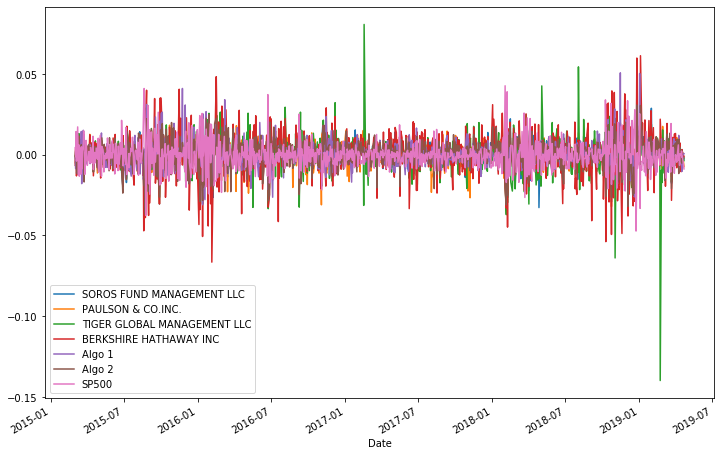

In [16]:
# Plot daily returns
# YOUR CODE HERE
all_returns.plot(figsize=(12,8))

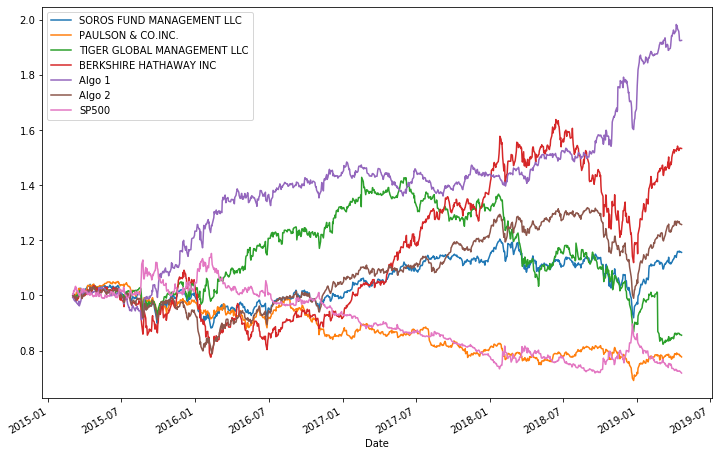

In [17]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.plot(figsize=(12,8))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

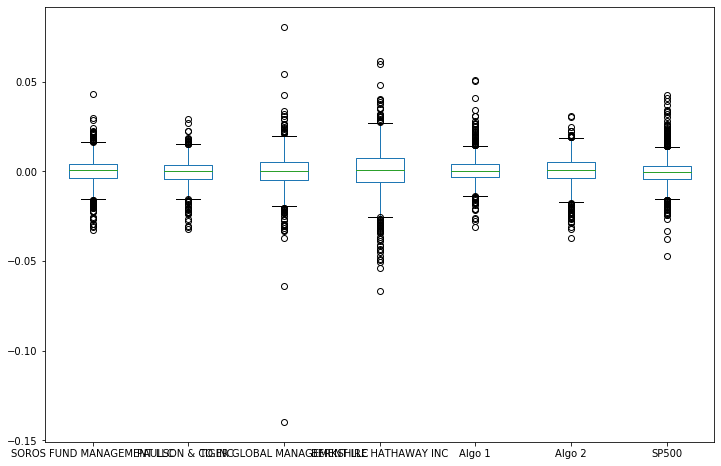

In [18]:
# Box plot to visually show risk
# YOUR CODE HERE
all_returns.plot(kind="box", figsize=(12,8))

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
all_returns.std().sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500                          0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
SP500_std = all_returns.std()["SP500"]
all_returns.std()[all_returns.std() > SP500_std].sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
(all_returns.std() * np.sqrt(252)).sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500                          0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

In [22]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_history_df.rolling(window=21).std().dropna()

,SP500
Date,
2019-03-22,0.004302
2019-03-21,0.006137
2019-03-20,0.006505
2019-03-19,0.006571
2019-03-18,0.006532
...,...
2012-10-05,0.009007
2012-10-04,0.007462
2012-10-03,0.007424


In [23]:
# Correlation
# YOUR CODE HERE
all_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
BH_covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['SP500'])
BH_variance = all_returns['BERKSHIRE HATHAWAY INC'].var()
BH_beta = BH_covariance / BH_variance
BH_beta

-0.009210082258045814

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [25]:
# (OPTIONAL) YOUR CODE HERE
sp500_history_df.ewm(halflife=21).mean()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.004823
2019-04-17,-0.003705
2019-04-16,-0.002134
2019-04-15,-0.001787
...,...
2012-10-05,0.000676
2012-10-04,0.000664
2012-10-03,0.000412


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [26]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

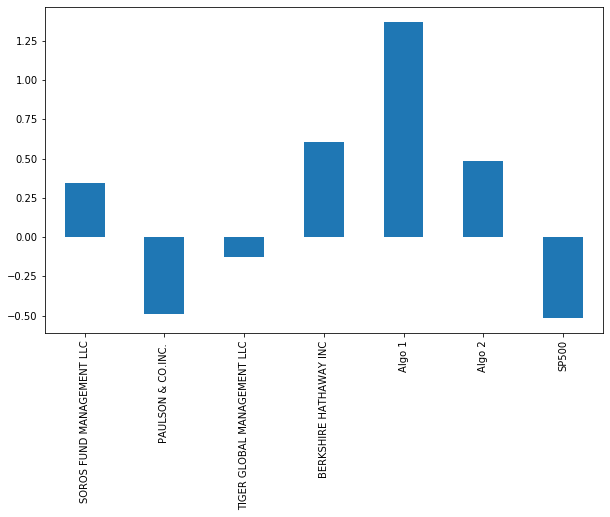

In [27]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar', figsize=(10,6))

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
# YOUR CODE HERE
aapl_history_csv = Path('Resources/aapl_historical.csv')
aapl_history_df = pd.read_csv(aapl_history_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_history_df.index.rename('Date', inplace=True)
aapl_history_df.rename(columns={'NOCP': 'AAPL'}, inplace=True)
aapl_history_df.drop(columns=['Symbol'], inplace=True)
aapl_history_df.head()

,AAPL
Date,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [29]:
# Read the second stock
# YOUR CODE HERE
goog_history_csv = Path('Resources/goog_historical.csv')
goog_history_df = pd.read_csv(goog_history_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_history_df.index.rename('Date', inplace=True)
goog_history_df.rename(columns={'NOCP': 'GOOG'}, inplace=True)
goog_history_df.drop(columns=['Symbol'], inplace=True)
goog_history_df.head()

,GOOG
Date,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [30]:
# Read the third stock
# YOUR CODE HERE
cost_history_csv = Path('Resources/cost_historical.csv')
cost_history_df = pd.read_csv(cost_history_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_history_df.index.rename('Date', inplace=True)
cost_history_df.rename(columns={'NOCP': 'COST'}, inplace=True)
cost_history_df.drop(columns=['Symbol'], inplace=True)
cost_history_df.head()

,COST
Date,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [31]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_portfolio = pd.concat([aapl_history_df, cost_history_df, goog_history_df], axis='columns', join='inner')
my_portfolio.head()

,AAPL,COST,GOOG
Date,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [141]:
# Reset the index
# YOUR CODE HERE

## Index column set for df's individually.

In [32]:
# Drop Nulls
# YOUR CODE HERE
my_portfolio.isnull().sum()

AAPL    0
COST    0
GOOG    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_weighted_returns = my_portfolio.dot(weights)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# YOUR CODE HERE
all_returns['My portfolio'] = my_weighted_returns.pct_change()
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.003027
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.007899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000599


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_returns.dropna(inplace=True)
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My portfolio
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.001091
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.015796
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.005114
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.002375
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.009334
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.003027
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.007899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000599


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

BERKSHIRE HATHAWAY INC         0.246819
TIGER GLOBAL MANAGEMENT LLC    0.232434
My portfolio                   0.228674
SP500                          0.152147
SOROS FUND MANAGEMENT LLC      0.146589
Algo 2                         0.139204
Algo 1                         0.133645
PAULSON & CO.INC.              0.116683
dtype: float64

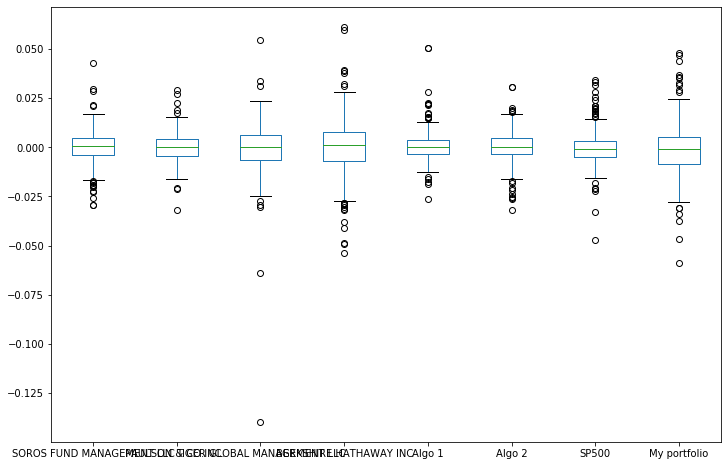

In [41]:
# Risk
# YOUR CODE HERE

#     Create a box plot for each portfolio.
returns_box_plot = all_returns.plot(kind='box', figsize=(12,8))

#     Calculate the standard deviation for all portfolios
returns_std = all_returns.std()

#     Determine which portfolios are riskier than the S&P 500
sp500_std = returns_std['SP500']
risky_portfolios = returns_std[returns_std > sp500_std]

#     Calculate the Annualized Standard Deviation
annualized_std = (returns_std * np.sqrt(252)).sort_values(ascending=False)

In [48]:
# Rolling
# YOUR CODE HERE

# Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
sp500_rolling_std = all_returns['SP500'].rolling(window=21).std().dropna()

# Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
stock_corrs = all_returns.corr()

In [49]:
# Beta
# YOUR CODE HERE

# Calculate and plot a 60-day Beta for My Portfolio compared to the S&P 500
my_port = all_returns['My portfolio']
sp500 = all_returns['SP500']
my_portfolio_beta = my_port.cov(sp500) / my_port.var()

In [51]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

all_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))

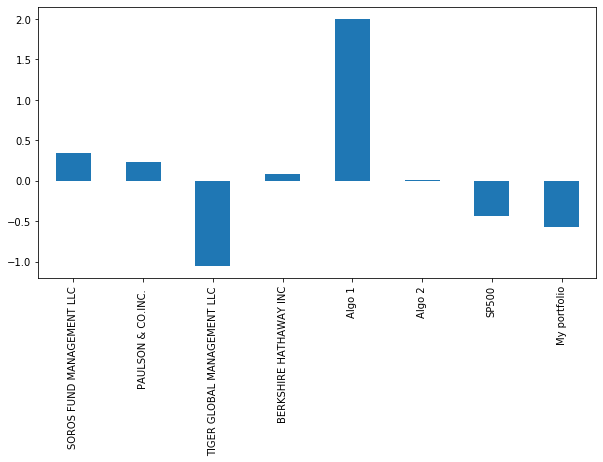

In [52]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe_ratios.plot(kind='bar', figsize=(10,5))

## Include correlation analysis to determine which stocks (if any) are correlated

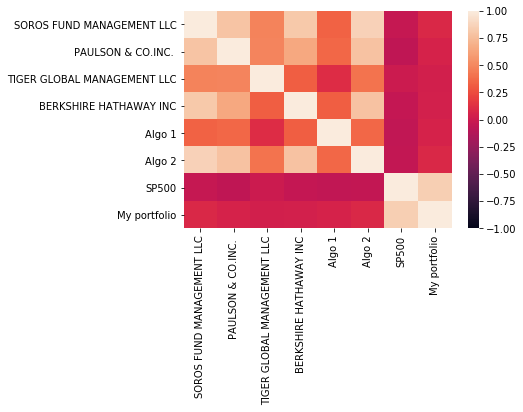

In [60]:
# YOUR CODE HERE
sns.heatmap(all_returns.corr(), vmin=-1, vmax=1)